<a href="https://colab.research.google.com/github/ImJustLearning01/DataAnalitucs-Jave/blob/main/2_clase_diplomado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINERÍA DE DATOS**



**Importar librerías**

In [ ]:
# pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.frequent_patterns import apriori, association_rules

Cargar los datos

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Establecer el estilo y el color de la visualización

In [ ]:
sns.set(style='ticks', palette='Greys')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Análisis exploratorio de los datos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


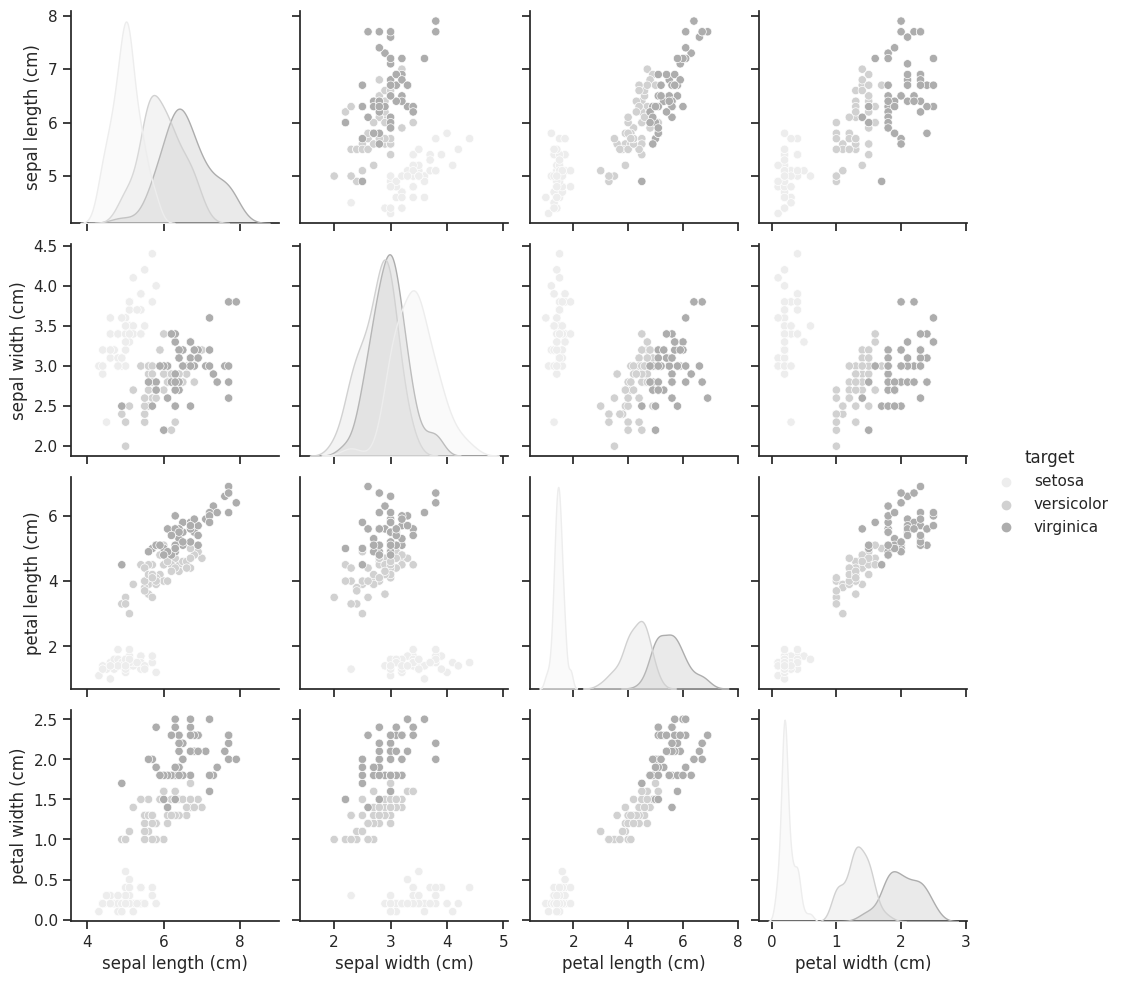

In [ ]:
sns.pairplot(df, hue='target')
plt.show()

Uso clustering usando K-means

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


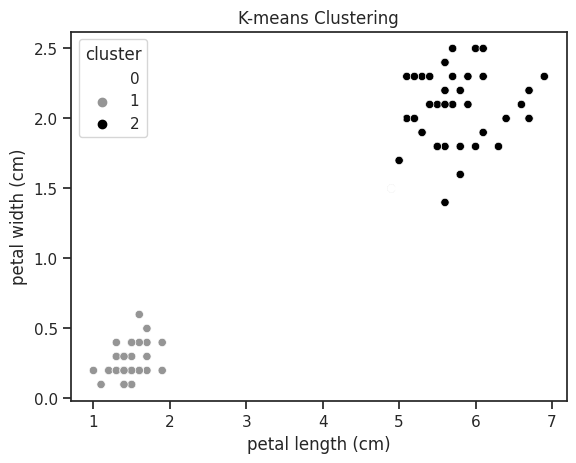

In [ ]:
# Seleccionar características para agrupar
X = df.drop('target', axis=1)

# Realizar el agrupamiento por K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# añadir etiquetas a los datos
df['cluster'] = kmeans.labels_

# usar gráfico de puntos en los datos agrupados
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='cluster', palette='Greys')
plt.title('K-means Clustering')
plt.show()

usar clasificación por Random Forest

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


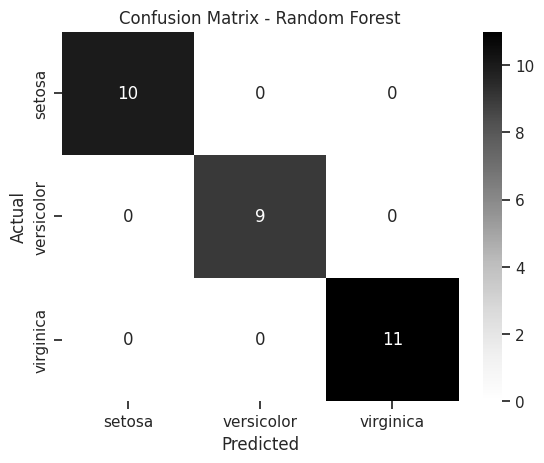

In [ ]:
# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=42)

# Entrenar el modelo de clasificación
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predecir los datos para el conjunto de prueba
y_pred = rf.predict(X_test)

# Graficar en una matriz de confusión
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Greys')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Usar análisis de regresión linear

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


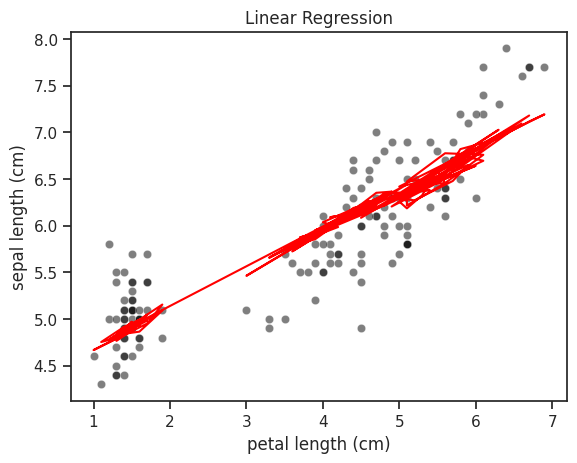

In [ ]:
# Seleccionar características y variable objetivo
X_regression = df[['petal length (cm)', 'petal width (cm)']]
y_regression = df['sepal length (cm)']

# Entrenar el modelo
regression_model = LinearRegression()
regression_model.fit(X_regression, y_regression)

# Graficar la regresión
sns.scatterplot(data=df, x='petal length (cm)', y='sepal length (cm)', color='black', alpha=0.5)
plt.plot(df['petal length (cm)'], regression_model.predict(X_regression), color='red')
plt.title('Linear Regression')
plt.show()

Minería de reglas de asociación usando Apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association Rules:
           antecedents          consequents  antecedent support  \
0   (petal width (cm))  (petal length (cm))                 1.0   
1  (petal length (cm))   (petal width (cm))                 1.0   

   consequent support  support  confidence  lift  leverage  conviction  \
0                 1.0      1.0         1.0   1.0       0.0         inf   
1                 1.0      1.0         1.0   1.0       0.0         inf   

   zhangs_metric  
0            0.0  
1            0.0  


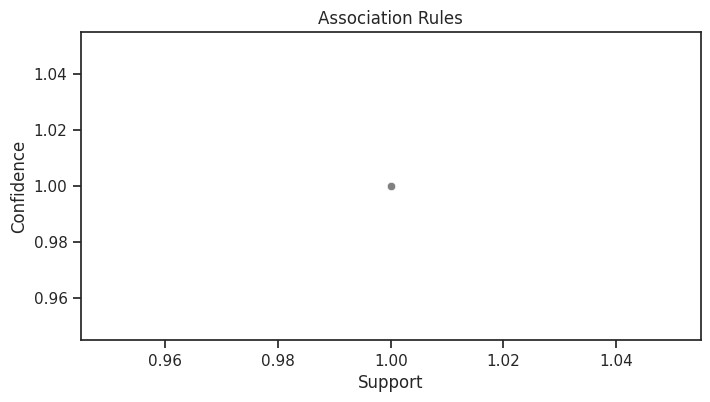

In [ ]:
# Convertir columnas categóricas a binarias
df_encoded = pd.get_dummies(df[['petal length (cm)', 'petal width (cm)']])

# Convertir vaores numéricos a binarios
df_encoded = df_encoded.applymap(lambda x: 1 if x > 0 else 0)

# Ejecutar el algoritmo Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# mostrar los resultados
print("Association Rules:")
print(association_rules)

# Visualizar las reglas de asociación
plt.figure(figsize=(8, 4))
sns.scatterplot(data=association_rules, x='support', y='confidence', color='grey')
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()